In [2]:
import csv
import math
import time
import warnings
import operator
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

import sys
sys.path.insert(0,'..')
import folium
from folium import plugins

from dateutil.parser import parse
from datetime import datetime
from scipy import stats
from IPython.display import display_html
from multiprocessing import Pool

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_ads = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_DATASET_V9.3.csv',index_col=0)
df_ads = df_ads.loc[:, ~df_ads.columns.str.contains('^Unnamed')]
df_ads.reset_index(drop=True, inplace=True)
print(df_ads.shape)

(19673, 156)


In [4]:
def count_outage(group):
    group = group.reset_index(drop = True)
    group['LIVE_OUTAGE'] = len(df_live_out[(df_live_out.CREATION_DATETIME < group.CREATION_DATETIME[0]) & (df_live_out.ENERGIZED_DATETIME > group.CREATION_DATETIME[0])])
    return group

df_live_out = df_ads[['OUTAGE_ID','CREATION_DATETIME','ENERGIZED_DATETIME']]
df_live_out = df_live_out.groupby(['OUTAGE_ID'], as_index = False).apply(count_outage)

In [5]:
df_ads = pd.merge(df_ads, df_live_out[['OUTAGE_ID','LIVE_OUTAGE']], on = ['OUTAGE_ID'], how = "left")

In [6]:
select_case1 = df_ads[df_ads.LIVE_OUTAGE_y > 50]
select_case1.reset_index(drop=True,inplace=True)
display(select_case1.head())
print("\n")

select_case2 = df_ads[(df_ads.LIVE_OUTAGE_y > 200) & (df_ads.LIVE_OUTAGE_y < 300) & (df_ads.CREATION_DATETIME < '2016-05-30 23:17:15')]
select_case2.reset_index(drop=True,inplace=True)
display(select_case2.tail())
print("\n")

select_case3 = df_ads[(df_ads.LIVE_OUTAGE_y > 400) & (df_ads.LIVE_OUTAGE_y < 500)]
select_case3.reset_index(drop=True,inplace=True)
display(select_case3.head())
print("\n")

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
0,2001393526,2000455375.00,369-A/159,STORM,2008-01-29 21:28:01,2008-01-30 10:50:00,2457.00,FUSE,245.00,46,44.00,0.00,NaN,44.00,175.00,175.00,False,801.98,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,INDIANAPOLIS,BROKEN WIRE,PRIMARY WIRE DOWN,NaN,TREE,ON PRIMARY,39.84,-86.12,ZONE3,94,nan,2.32,Marker8,-0.71,0.71,20080001002.00,2008-01-30 20:48:00,2008-01-29 19:19:21,48.00,WINTER,2008-01-29,100.00,100.00,97.00,39.00,50.40,8.30,37.70,48.30,-1.60,43.70,52.50,14.00,39.84,-86.10,998.00,1005.00,988.70,0.40,-0.10,3.70,-1.90,13.20,55.40,0.00,317.00,84.70,99.80,53.60,970.00,975.70,960.30,0.00,0.00,5.60,8.10,1.40,43.70,52.50,14.00,41.60,51.30,12.70,37.70,48.30,-1.60,216.00,216.00,210.00,27.20,37.20,19.90,27.60,37.50,20.30,11.40,21.30,7.10,5.60,38.50,14.20,15.40,3.00,46.20,1.86,1.02,Cluster4,51
1,2001393530,2000455377.00,M01-Z/16,STORM,2008-01-29 21:31:14,2008-01-30 00:45:00,7052.00,FUSE,705.00,1,1.00,0.00,NaN,1.00,15.00,15.00,False,193.77,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,MOORESVILLE,BROKEN WIRE,OTHER,NaN,O.H. EQUIPMENT,JUMPER BURNED OPEN,39.60,-86.42,ZONE1,95,nan,1.16,Marker18,-0.71,0.71,20080001002.00,2008-01-30 20:48:00,2008-01-29 19:19:21,49.00,WINTER,2008-01-29,100.00,100.00,98.00,38.30,49.90,6.80,34.60,49.60,-10.90,42.80,54.10,10.50,39.59

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
855,2002216308,2001124182.00,432-B/121,STORM,2016-04-03 08:48:00,2016-04-03 18:00:00,3209.00,FUSE,320.00,10,56.00,0.00,2016-04-03 18:30:00,56.00,200.00,0.00,True,552.00,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,INDIANAPOLIS,TRANSFORMER,SECONDARY BUSHING,NaN,TREE,TREE ON PRI (OUTSIDE TRIM ZONE),39.81,-86.19,ZONE4,219,68.00,3.89,Marker7,0.87,-0.50,20160007002.00,2016-04-05 02:07:09,2016-04-02 13:04:22,236.00,SPRING,2016-04-03,2.00,22.00,0.00,27.70,39.80,19.10,42.90,62.00,23.20,45.90,62.00,26.30,39.84,-86.21,1014.70,1019.50,1009.00,0.00,-0.30,0.90,-2.10,280.00,889.00,0.00,6720.00,51.80,84.30,34.00,986.40,991.50,980.50,0.00,0.00,3.40,5.30,2.30,45.90,62.00,26.30,38.90,50.30,24.90,42.90,62.00,23.20,222.00,222.00,216.00,18.70,32.80,4.70,18.80,32.40,4.70,9.40,17.90,1.80,3.00,35.70,16.10,11.00,22.00,50.30,2.48,1.01,Cluster2,202
856,2002216106,2001124188.00,515-A/165,STORM,2016-04-03 08:57:28,2016-04-03 09:02:40,3453.00,1TBOH,345.00,1,3.00,0.00,NaN,3.00,50.00,50.00,True,5.20,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,OPENED FOR SAFETY,FOR TREE CREW,NaN,NaN,NaN,39.78,-86.07,ZONE3,218,68.00,3.02,Marker12,0.87,-0.50,20160007002.00,2016-04-05 02:07:09,2016-04-02 13:04:22,237.00,SPRING,2016-04-03,2.00,26.00,0.00,27.00,39.00,19.90,43.00,62.0

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
0,2001425183,2000480632.00,231-A/36,STORM,2008-05-31 08:16:51,2008-06-01 12:30:00,2857.00,1TBOH,285.00,5,4.00,0.00,NaN,4.00,25.00,25.00,True,1693.15,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,TREE,ON PRIMARY,39.90,-86.21,ZONE4,664,nan,0.64,Marker3,0.87,-0.50,20080006003.00,2008-06-05 15:54:11,2008-05-30 21:27:08,361.00,SPRING,2008-05-31,50.00,100.00,1.00,62.20,69.10,56.20,74.10,81.40,66.50,74.10,81.40,66.50,39.91,-86.20,1009.80,1011.90,1007.40,0.00,0.20,0.80,-0.40,332.70,972.20,0.00,7985.40,70.00,100.00,44.00,980.20,981.90,977.60,0.00,0.00,12.50,15.60,10.00,73.60,80.90,66.50,66.40,69.40,61.60,73.60,80.90,66.50,263.00,263.00,262.00,15.50,24.70,8.20,15.60,24.70,8.50,9.10,18.00,2.20,1.20,14.40,15.80,4.30,99.00,56.00,2.27,1.00,Cluster3,401
1,2001425191,2000480638.00,442-B/77,STORM,2008-05-31 08:18:43,2008-06-02 20:59:50,5454.00,1TBOH,28.00,3,4.00,0.00,NaN,4.00,25.00,25.00,True,3641.12,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,WEATHER,LIGHTNING,39.81,-86.10,ZONE3,665,nan,3.62,Marker8,0.87,-0.50,20080006003.00,2008-06-05 15:54:11,2008-05-30 21:27:08,362.00,SPRING,2008-05-31,54.00,100.00,0.00,62.80,69.80,57.30,74.60,81.70,66.60,74.60,81.70,66.60,39.84,-86.10,1010.00,1012.00,1007.80,

In [7]:
def join_priority(x1, x2, x3, x4):
    if x1 is True:
        return 1.0
    elif x2 is True:
        return 2.0
    elif x3 is True:
        return 3.0
    elif x4 is True:
        return 5.0
    else :
        return 0.0
    
df_ads['Priority'] = df_ads.apply(lambda x: join_priority(x['PRIORITY_VAL_1.0'], x['PRIORITY_VAL_2.0'], x['PRIORITY_VAL_3.0'], x['PRIORITY_VAL_5.0']),axis=1)
df_ads['Priority'].unique()

array([2., 5., 0., 3., 1.])

In [87]:
case1 = (df_ads[(df_ads.CREATION_DATETIME < "2019-06-23 17:08:20") & (df_ads.ENERGIZED_DATETIME > "2019-06-23 17:08:20")])
case2 = (df_ads[(df_ads.CREATION_DATETIME < "2014-01-07 12:37:00") & (df_ads.ENERGIZED_DATETIME > "2014-01-07 12:37:00")])
case3 = (df_ads[(df_ads.CREATION_DATETIME < "2008-05-31 08:16:51") & (df_ads.ENERGIZED_DATETIME > "2008-05-31 08:16:51")])

In [88]:
print(case1.shape)
print(case2.shape)
print(case3.shape)

(56, 158)
(270, 158)
(401, 158)


#### CASE 1 
- Index 19629
- Outage ID - 2002571985
- Creation Datetime - 2019-06-23 17:08:20
- Outages - 56

In [89]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

ls_1 = folium.PolyLine([[39.9371, -86.3134],[39.9371, -86.1603],[39.8407, -86.1610],[39.8407, -86.3134],[39.9371, -86.3134]], color='red')
ls_1.add_children(folium.Popup("34th"))
ls_1.add_to(ipl_map)

ls_2 = folium.PolyLine([[39.9371, -86.1603],[39.9371, -86.0120],[39.8407, -86.0120],[39.8407, -86.3086]], color='red')
ls_2.add_children(folium.Popup("ARL."))
ls_2.add_to(ipl_map)

ls_3 = folium.PolyLine([[39.8407, -86.1610],[39.7442, -86.1610],[39.7442, -86.3134],[39.8407, -86.3134]], color='red')
ls_3.add_children(folium.Popup("MILL"))
ls_3.add_to(ipl_map)

ls_4 = folium.PolyLine([[39.8407, -86.0120],[39.7442, -86.0100],[39.7442, -86.1610]], color='red')
ls_4.add_children(folium.Popup("ENGLISH"))
ls_4.add_to(ipl_map)

ls_5 = folium.PolyLine([[39.7442, -86.0100],[39.6554, -86.0100],[39.6554, -86.1610],[39.7442, -86.1610]], color='red')
ls_5.add_children(folium.Popup("SOUTH"))
ls_5.add_to(ipl_map)

ls_6 = folium.PolyLine([[39.6554, -86.1610],[39.6554, -86.3134],[39.7442, -86.3134]], color='red')
ls_6.add_children(folium.Popup("W.I."))
ls_6.add_to(ipl_map)

folium.Marker([39.8802, -86.2324],popup='34th [Lat,Long]=[39.8802, -86.2324]',icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.8802, -86.0854],popup='ARL. [Lat,Long]=[39.8802, -86.0854]',icon=folium.Icon(color='green', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.2296],popup='MILL [Lat,Long]=[39.7880, -86.2296]',icon=folium.Icon(color='blue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.0868],popup='ENGLISH [Lat,Long]=[39.7880, -86.0868]',icon=folium.Icon(color='red', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.2303],popup='W.I. [Lat,Long]=[39.7003, -86.2303]',icon=folium.Icon(color='pink', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.0834],popup='SOUTH [Lat,Long]=[39.7003, -86.0834]',icon=folium.Icon(color='lightgray', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)

for i in range(0,len(case1)):
    folium.Marker([case1.iloc[i]['LAT'], case1.iloc[i]['LONG']],popup=case1.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

ipl_map

#### CASE 2 
* Index 10101
* Outage ID - 2001995358
* CREATION_DATETIME - 2014-01-07 12:37:00
* Outages - 270

In [90]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

ls_1 = folium.PolyLine([[39.9371, -86.3134],[39.9371, -86.1603],[39.8407, -86.1610],[39.8407, -86.3134],[39.9371, -86.3134]], color='red')
ls_1.add_children(folium.Popup("34th"))
ls_1.add_to(ipl_map)

ls_2 = folium.PolyLine([[39.9371, -86.1603],[39.9371, -86.0120],[39.8407, -86.0120],[39.8407, -86.3086]], color='red')
ls_2.add_children(folium.Popup("ARL."))
ls_2.add_to(ipl_map)

ls_3 = folium.PolyLine([[39.8407, -86.1610],[39.7442, -86.1610],[39.7442, -86.3134],[39.8407, -86.3134]], color='red')
ls_3.add_children(folium.Popup("MILL"))
ls_3.add_to(ipl_map)

ls_4 = folium.PolyLine([[39.8407, -86.0120],[39.7442, -86.0100],[39.7442, -86.1610]], color='red')
ls_4.add_children(folium.Popup("ENGLISH"))
ls_4.add_to(ipl_map)

ls_5 = folium.PolyLine([[39.7442, -86.0100],[39.6554, -86.0100],[39.6554, -86.1610],[39.7442, -86.1610]], color='red')
ls_5.add_children(folium.Popup("SOUTH"))
ls_5.add_to(ipl_map)

ls_6 = folium.PolyLine([[39.6554, -86.1610],[39.6554, -86.3134],[39.7442, -86.3134]], color='red')
ls_6.add_children(folium.Popup("W.I."))
ls_6.add_to(ipl_map)

folium.Marker([39.8802, -86.2324],popup='34th [Lat,Long]=[39.8802, -86.2324]',icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.8802, -86.0854],popup='ARL. [Lat,Long]=[39.8802, -86.0854]',icon=folium.Icon(color='green', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.2296],popup='MILL [Lat,Long]=[39.7880, -86.2296]',icon=folium.Icon(color='blue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.0868],popup='ENGLISH [Lat,Long]=[39.7880, -86.0868]',icon=folium.Icon(color='red', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.2303],popup='W.I. [Lat,Long]=[39.7003, -86.2303]',icon=folium.Icon(color='pink', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.0834],popup='SOUTH [Lat,Long]=[39.7003, -86.0834]',icon=folium.Icon(color='lightgray', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)

for i in range(0,len(case2)):
    folium.Marker([case2.iloc[i]['LAT'], case2.iloc[i]['LONG']],popup=case2.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

ipl_map

#### CASE 3
- Index 1142
- Outage ID - 2001425183
- Creation Datetime - 2008-05-31 08:16:51
- Outages - 401

In [91]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

ls_1 = folium.PolyLine([[39.9371, -86.3134],[39.9371, -86.1603],[39.8407, -86.1610],[39.8407, -86.3134],[39.9371, -86.3134]], color='red')
ls_1.add_children(folium.Popup("34th"))
ls_1.add_to(ipl_map)

ls_2 = folium.PolyLine([[39.9371, -86.1603],[39.9371, -86.0120],[39.8407, -86.0120],[39.8407, -86.3086]], color='red')
ls_2.add_children(folium.Popup("ARL."))
ls_2.add_to(ipl_map)

ls_3 = folium.PolyLine([[39.8407, -86.1610],[39.7442, -86.1610],[39.7442, -86.3134],[39.8407, -86.3134]], color='red')
ls_3.add_children(folium.Popup("MILL"))
ls_3.add_to(ipl_map)

ls_4 = folium.PolyLine([[39.8407, -86.0120],[39.7442, -86.0100],[39.7442, -86.1610]], color='red')
ls_4.add_children(folium.Popup("ENGLISH"))
ls_4.add_to(ipl_map)

ls_5 = folium.PolyLine([[39.7442, -86.0100],[39.6554, -86.0100],[39.6554, -86.1610],[39.7442, -86.1610]], color='red')
ls_5.add_children(folium.Popup("SOUTH"))
ls_5.add_to(ipl_map)

ls_6 = folium.PolyLine([[39.6554, -86.1610],[39.6554, -86.3134],[39.7442, -86.3134]], color='red')
ls_6.add_children(folium.Popup("W.I."))
ls_6.add_to(ipl_map)

folium.Marker([39.8802, -86.2324],popup='34th [Lat,Long]=[39.8802, -86.2324]',icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.8802, -86.0854],popup='ARL. [Lat,Long]=[39.8802, -86.0854]',icon=folium.Icon(color='green', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.2296],popup='MILL [Lat,Long]=[39.7880, -86.2296]',icon=folium.Icon(color='blue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7880, -86.0868],popup='ENGLISH [Lat,Long]=[39.7880, -86.0868]',icon=folium.Icon(color='red', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.2303],popup='W.I. [Lat,Long]=[39.7003, -86.2303]',icon=folium.Icon(color='pink', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
folium.Marker([39.7003, -86.0834],popup='SOUTH [Lat,Long]=[39.7003, -86.0834]',icon=folium.Icon(color='lightgray', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)

for i in range(0,len(case3)):
    folium.Marker([case3.iloc[i]['LAT'], case3.iloc[i]['LONG']],popup=case3.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

ipl_map

## **APPROACH 1**

-Divide IPL coverage area into 6 equal grids <br>
-Grids are decided as per Troubleman dispatch location across Indianapolis <br>
-Calculate the distance of each outage location from trouble man dispatch area centers <br>
-Identify which grid has most outages, get the distance between the actual dispatch grid and reference dispatch grid <br>
-Group by number of outages in each dispatch area and sort based on higher customer quantity <br>

In [92]:
import geopy.distance

def cal_distance(lat, long):
    coords1 = [lat,long]
    dist_34 = geopy.distance.distance(coords1, [39.8802, -86.2324]).miles
    dist_arl = geopy.distance.distance(coords1, [39.8802, -86.0854]).miles
    dist_mill = geopy.distance.distance(coords1, [39.7880, -86.2296]).miles
    dist_english = geopy.distance.distance(coords1, [39.7880, -86.0868]).miles
    dist_wii = geopy.distance.distance(coords1, [39.7003, -86.2303]).miles
    dist_south = geopy.distance.distance(coords1, [39.7003, -86.0834]).miles
    
    dist_list = [dist_34, dist_arl, dist_mill, dist_english, dist_wii, dist_south]

    min_index, min_value = min(enumerate(dist_list), key=operator.itemgetter(1))
    
    return min_value, min_index+1

In [93]:
case1 = case1.dropna(subset=['LAT','LONG'],how='any')
case1.reset_index(drop=True,inplace=True)
print(case1.shape)

case2 = case2.dropna(subset=['LAT','LONG'],how='any')
case2.reset_index(drop=True,inplace=True)
print(case2.shape)

case3 = case3.dropna(subset=['LAT','LONG'],how='any')
case3.reset_index(drop=True,inplace=True)
print(case3.shape)

(56, 158)
(270, 158)
(401, 158)


In [94]:
case1['Min_Distance'], case1['Grid'] = zip(*case1.apply(lambda row: cal_distance(row['LAT'], row['LONG']),axis=1))
case2['Min_Distance'], case2['Grid'] = zip(*case2.apply(lambda row: cal_distance(row['LAT'], row['LONG']),axis=1))
case3['Min_Distance'], case3['Grid'] = zip(*case3.apply(lambda row: cal_distance(row['LAT'], row['LONG']),axis=1))

In [95]:
def map_grid_to_location(row):
    if row==1:
        return '34th'
    elif row==2:
        return 'ARL.'
    elif row==3:
        return 'MILL'
    elif row==4:
        return 'ENGLISH'
    elif row==5:
        return 'W.I.'
    elif row==6:
        return 'SOUTH'
    else :
        return "ERROR"
    
case1['Dispatch_Location'] = case1.apply(lambda row: map_grid_to_location(row['Grid']),axis=1)
case2['Dispatch_Location'] = case2.apply(lambda row: map_grid_to_location(row['Grid']),axis=1)
case3['Dispatch_Location'] = case3.apply(lambda row: map_grid_to_location(row['Grid']),axis=1)

In [96]:
df_outage_1 = case1.groupby(['Dispatch_Location'],as_index=False).agg({'INCIDENT_ID' : 'count', 'DOWNSTREAM_CUST_QTY': 'sum'})
df_outage_1.rename(columns = {'INCIDENT_ID': 'No_of_Outages'},inplace=True)
df_outage_1.sort_values(by='No_of_Outages',ascending=False,inplace=True)
df_outage_2 = case2.groupby(['Dispatch_Location'],as_index=False).agg({'INCIDENT_ID' : 'count', 'DOWNSTREAM_CUST_QTY': 'sum'})
df_outage_2.rename(columns = {'INCIDENT_ID': 'No_of_Outages'},inplace=True)
df_outage_2.sort_values(by='No_of_Outages',ascending=False,inplace=True)
df_outage_3 = case3.groupby(['Dispatch_Location'],as_index=False).agg({'INCIDENT_ID' : 'count', 'DOWNSTREAM_CUST_QTY': 'sum'})
df_outage_3.rename(columns = {'INCIDENT_ID': 'No_of_Outages'},inplace=True)
df_outage_3.sort_values(by='No_of_Outages',ascending=False,inplace=True)

In [97]:
display(df_outage_1)
print('\n')
display(df_outage_2)
print('\n')
display(df_outage_3)
print('\n')

,Dispatch_Location,No_of_Outages,DOWNSTREAM_CUST_QTY
2,ENGLISH,21,1508.00
4,SOUTH,15,1626.00
5,W.I.,8,1638.00
1,ARL.,7,1009.00
3,MILL,3,1349.00
0,34th,2,161.00


,Dispatch_Location,No_of_Outages,DOWNSTREAM_CUST_QTY
2,ENGLISH,79,1983.00
1,ARL.,66,1343.00
4,SOUTH,40,1103.00
0,34th,38,678.00
3,MILL,33,537.00
5,W.I.,14,224.00


,Dispatch_Location,No_of_Outages,DOWNSTREAM_CUST_QTY
1,ARL.,168,18323.00
2,ENGLISH,105,6303.00
0,34th,73,2406.00
3,MILL,28,3165.00
4,SOUTH,18,377.00
5,W.I.,9,587.00


In [98]:
df_outage_1 = case1.groupby(['Dispatch_Location'],as_index=False).agg({'INCIDENT_ID' : 'count'})
df_outage_1.rename(columns = {'INCIDENT_ID': 'No_of_Outages'},inplace=True)
df_outage_1.sort_values(by='No_of_Outages',ascending=False,inplace=True)
df_outage_1.reset_index(drop=True,inplace=True)
df_outage_1['Dispatch_Location'][0]

'ENGLISH'

In [99]:
def dispatch_location_coordinates(Dispatch_Location):
    
    if Dispatch_Location == '34th':
        return 39.8802, -86.2324
    elif Dispatch_Location == 'ARL.':
        return 39.8802, -86.0854
    elif Dispatch_Location == 'MILL':
        return 39.7880, -86.2296
    elif Dispatch_Location == 'ENGLISH':
        return 39.7880, -86.2296
    elif Dispatch_Location == 'W.I.':
        return 39.7003, -86.2303
    elif Dispatch_Location == 'SOUTH':
        return 39.7003, -86.0834
    
case1['Dis_LAT'], case1['Dis_LONG'] = zip(*case1.apply(lambda row: dispatch_location_coordinates(row.Dispatch_Location),axis=1))
case2['Dis_LAT'], case2['Dis_LONG'] = zip(*case2.apply(lambda row: dispatch_location_coordinates(row.Dispatch_Location),axis=1))
case3['Dis_LAT'], case3['Dis_LONG'] = zip(*case3.apply(lambda row: dispatch_location_coordinates(row.Dispatch_Location),axis=1))

In [100]:
def distance_from_dispatch_location(case):
    
    x = case.groupby(['Dispatch_Location'],as_index=False).agg({'INCIDENT_ID' : 'count'})
    x.rename(columns = {'INCIDENT_ID': 'No_of_Outages'},inplace=True)
    x.sort_values(by='No_of_Outages',ascending=False,inplace=True)
    x.reset_index(drop=True,inplace=True)
    location = x['Dispatch_Location'][0]
    list_1 = []
    
    print(location)
    
    for i in range(len(case)):

        if location=='34th':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.8802, -86.2324]).miles)
    
        elif location=='ARL.':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.8802, -86.0854]).miles)
    
        elif location=='MILL':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.7880, -86.2296]).miles)
    
        elif location=='ENGLISH':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.7880, -86.2296]).miles)
        
        elif location=='W.I.':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.7003, -86.2303]).miles)
        
        elif location=='SOUTH':
            list_1.append(geopy.distance.distance([case.Dis_LAT[i],case.Dis_LONG[i]], [39.7003, -86.0834]).miles)

    case['Distance_From_Dispatch_Location'] = list_1
    return case
        
case1 = distance_from_dispatch_location(case1)
case2 = distance_from_dispatch_location(case2)
case3 = distance_from_dispatch_location(case3)

ENGLISH
ENGLISH
ARL.


In [104]:
case1['Min_distanceXCust_qty'] = case1['Min_Distance'] * case1['DOWNSTREAM_CUST_QTY']

case1['Rank'] = case1.groupby(['Dispatch_Location','Distance_From_Dispatch_Location'])['DOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)
case2['Rank_ap1'] = case2.groupby(['Dispatch_Location','Distance_From_Dispatch_Location'])['DOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)
case3['Rank_ap1'] = case3.groupby(['Dispatch_Location','Distance_From_Dispatch_Location'])['DOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)

In [105]:
case1['Min_distanceXCust_qty'] = case1['Min_Distance'] * case1['DOWNSTREAM_CUST_QTY']
case2['Min_distanceXCust_qty'] = case2['Min_Distance'] * case2['DOWNSTREAM_CUST_QTY']
case3['Min_distanceXCust_qty'] = case3['Min_Distance'] * case3['DOWNSTREAM_CUST_QTY']

case1['Rank_ap2'] = case1['Min_distanceXCust_qty'].rank(method='min',ascending=False)
case2['Rank_ap2'] = case2['Min_distanceXCust_qty'].rank(method='min',ascending=False)
case3['Rank_ap2'] = case3['Min_distanceXCust_qty'].rank(method='min',ascending=False)

In [107]:
case1[['LAT','LONG','Dispatch_Location','Distance_From_Dispatch_Location','DOWNSTREAM_CUST_QTY','Rank']].head(10)

,LAT,LONG,Dispatch_Location,Distance_From_Dispatch_Location,DOWNSTREAM_CUST_QTY,Rank
0,39.80,-86.03,ENGLISH,0.00,31.00,9.00
1,39.65,-86.19,W.I.,6.05,17.00,6.00
2,39.69,-86.22,W.I.,6.05,8.00,8.00
3,39.72,-86.23,W.I.,6.05,86.00,2.00
4,39.66,-86.16,SOUTH,9.86,10.00,7.00
5,39.66,-86.16,W.I.,6.05,82.00,3.00
6,39.68,-86.18,W.I.,6.05,27.00,5.00
7,39.65,-86.17,W.I.,6.05,50.00,4.00
8,39.52,-86.31,W.I.,6.05,12.00,7.00
9,39.82,-86.32,MILL,0.00,163.00,2.00


In [64]:
case1.sort_values(by='Rank_ap2',inplace=True)
case1.reset_index(drop=True,inplace=True)
case1[['LAT','LONG','Dispatch_Location','Min_Distance','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank_ap2']].head(10)

,LAT,LONG,Dispatch_Location,Min_Distance,DOWNSTREAM_CUST_QTY,Min_distanceXCust_qty,Rank_ap2
0,39.81,-86.32,MILL,5.14,1121.00,5762.36,1.00
1,39.67,-86.19,W.I.,2.74,1356.00,3713.52,2.00
2,39.73,-86.05,SOUTH,2.68,1368.00,3661.78,3.00
3,39.80,-86.01,ENGLISH,4.16,763.00,3172.73,4.00
4,39.84,-86.10,ARL.,2.93,773.00,2262.52,5.00
5,39.82,-86.32,MILL,5.28,163.00,860.51,6.00
6,39.81,-86.01,ENGLISH,4.34,106.00,459.94,7.00
7,39.90,-86.18,34th,3.14,145.00,455.24,8.00
8,39.66,-86.16,W.I.,4.77,82.00,390.76,9.00
9,39.83,-86.00,ENGLISH,5.46,71.00,387.99,10.00


In [61]:
case2.sort_values(by='Rank_ap2',inplace=True)
case2.reset_index(drop=True,inplace=True)
case2[['LAT','LONG','Dispatch_Location','Min_Distance','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank_ap2']].head(10)

,LAT,LONG,Dispatch_Location,Min_Distance,DOWNSTREAM_CUST_QTY,Min_distanceXCust_qty,Rank_ap2
0,39.88,-85.96,ARL.,6.82,126.00,859.64,1.00
1,39.64,-86.14,SOUTH,5.39,139.00,749.37,2.00
2,39.75,-86.12,ENGLISH,3.04,240.00,729.70,3.00
3,39.65,-86.14,SOUTH,4.49,131.00,588.41,4.00
4,39.83,-85.98,ENGLISH,6.14,94.00,577.52,5.00
5,39.81,-85.99,ENGLISH,5.60,94.00,526.04,6.00
6,39.65,-86.12,SOUTH,3.96,123.00,486.77,7.00
7,39.78,-86.14,ENGLISH,2.89,122.00,353.10,8.00
8,39.83,-86.02,ENGLISH,4.69,75.00,351.60,9.00
9,39.66,-86.15,SOUTH,4.69,65.00,304.64,10.00


In [62]:
case3.sort_values(by='Rank_ap2',inplace=True)
case3.reset_index(drop=True,inplace=True)
case3[['LAT','LONG','Dispatch_Location','Min_Distance','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank_ap2']].head(10)

,LAT,LONG,Dispatch_Location,Min_Distance,DOWNSTREAM_CUST_QTY,Min_distanceXCust_qty,Rank_ap2
0,35.24,-86.76,W.I.,308.79,130.00,40143.25,1.00
1,39.89,-85.96,ARL.,6.86,1490.00,10227.61,2.00
2,39.87,-85.97,ARL.,6.14,1263.00,7755.44,3.00
3,39.90,-86.00,ARL.,4.95,1127.00,5581.64,4.00
4,39.86,-86.13,ARL.,2.83,1578.00,4458.59,5.00
5,39.87,-85.97,ARL.,5.97,702.00,4192.12,6.00
6,39.84,-86.05,ARL.,3.33,1215.00,4042.00,7.00
7,39.75,-86.21,MILL,2.90,1266.00,3672.77,8.00
8,39.85,-86.14,ARL.,3.51,992.00,3482.03,9.00
9,39.90,-86.01,ARL.,4.25,694.00,2948.32,10.00


In [31]:
case3[['LAT','LONG','Dispatch_Location','Distance_From_Dispatch_Location','DOWNSTREAM_CUST_QTY','Rank_ap1']].head(10)

,LAT,LONG,Dispatch_Location,Distance_From_Dispatch_Location,DOWNSTREAM_CUST_QTY,Rank_ap1
0,39.90,-86.23,34th,7.81,56.00,10.00
1,39.91,-86.31,34th,7.81,54.00,11.00
2,39.90,-86.28,34th,7.81,23.00,25.00
3,39.93,-86.15,ARL.,0.00,35.00,57.00
4,39.91,-86.15,ARL.,0.00,38.00,55.00
5,39.84,-86.14,ARL.,0.00,276.00,15.00
6,39.85,-86.15,ARL.,0.00,55.00,42.00
7,39.88,-86.11,ARL.,0.00,25.00,65.00
8,39.87,-86.07,ARL.,0.00,15.00,75.00
9,39.86,-86.09,ARL.,0.00,56.00,41.00


In [ ]:
case1[['LAT','LONG','Dispatch_Location','Min_Distance','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank']].head(10)

In [ ]:
case1.sort_values(by='Rank',inplace=True)
case1.reset_index(drop=True,inplace=True)
case1[['LAT','LONG','Dispatch_Location','Min_Distance','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank']].head(20)

In [ ]:
case1_merged.sort_values(by='Rank',inplace=True)
case1_merged.reset_index(drop=True,inplace=True)
case1_merged[['LAT','LONG','Dispatch_Location','No_of_Outages','DOWNSTREAM_CUST_QTY','Min_distanceXCust_qty','Rank']].head(20)

In [ ]:
case2[['LAT','LONG','Dispatch_Location','Min_Distance','Distance_From_Dispatch_Location','DOWNSTREAM_CUST_QTY','Rank']].head(10)

In [ ]:
case3[['LAT','LONG','Dispatch_Location','Min_Distance','Distance_From_Dispatch_Location','DOWNSTREAM_CUST_QTY','Rank']].head(10)

In [80]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

for i in range(0,len(case3)):
    folium.Marker([case3.iloc[i]['LAT'], case3.iloc[i]['LONG']],popup=round(case3.iloc[i]['Min_distanceXCust_qty'],2),icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

ipl_map

### Scatter Plot TTR vs Rank

,TTR,Min_Distance
TTR,1.00,-0.20
Min_Distance,-0.20,1.00


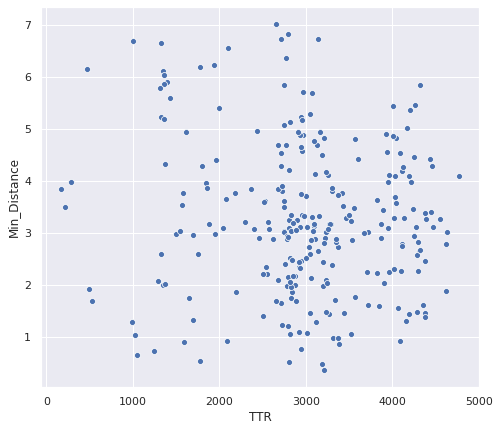

In [79]:
sns.set()
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Min_Distance", data=case2[case2.Min_Distance<15])
case2[['TTR','Min_Distance']].corr()

In [ ]:
sns.set()
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Min_Distance", data=case2)

In [ ]:
sns.set()
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Min_Distance", data=case3[case3.Min_Distance<300])

### Scatter Plot TTR vs DOWNSTREAM_CUST_QTY

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="DOWNSTREAM_CUST_QTY", data=case1)

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="DOWNSTREAM_CUST_QTY", data=case2)

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="DOWNSTREAM_CUST_QTY", data=case3)

### Scatter Plot TTR vs RANK

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Rank", data=case1)

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Rank", data=case2)

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Rank", data=case3)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
col_list = ['Rank','DOWNSTREAM_CUST_QTY','Min_Distance','TTR', 'Distance_From_Dispatch_Location']
df_ads_numeric = case1[col_list].select_dtypes(include=numerics)

corr_plot_numerical= df_ads_numeric

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = corr_plot_numerical.corr()
corr = corr.round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
# cmap = sns.diverging._palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, vmin=-1)

## **APPROACH 2**

-Divide IPL coverage area into 6 equal grids <br>
-Grids are decided as per Troubleman dispatch location across Indianapolis <br>
-Calculate the distance of each outage location from trouble man dispatch area centers <br>
-Identify which grid has most outages, get the distance between the actual dispatch grid and reference dispatch grid <br>
-Rank based higher distance from each outage * customer quantity) <br>

In [ ]:
case1.head()

In [ ]:
case1['Rank_ap2'] = 'Min_distanceXDOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)
case2['Rank'] = case2.groupby(['Dispatch_Location','Distance_From_Dispatch_Location'])['DOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)
case3['Rank'] = case3.groupby(['Dispatch_Location','Distance_From_Dispatch_Location'])['DOWNSTREAM_CUST_QTY'].rank(method='dense', ascending=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [ ]:
def do_union(lst1, lst2, lst3, lst4): 
    final_list = list(set(lst1) | set(lst2) | set(lst3) | set(lst4))
    return final_list 

In [ ]:
print(list(case1_merged.columns))

In [ ]:
select_columns_from_ads = ['CALL_QTY', 'DOWNSTREAM_CUST_QTY', 'KEY_CUST_QTY', 'CUST_QTY', 'DOWNSTREAM_KVA_VAL', 
                           'KVA_VAL', 'DAY_FLAG', 'TTR', 'POLE_CLUE_FLG', 'PART_LIGHT_CLUE_FLG', 'EMERGENCY_CLUE_FLG', 'POWER_OUT_CLUE_FLG', 
                           'OPEN_DEVICE_CLUE_FLG', 'TREE_CLUE_FLG', 'WIRE_DOWN_CLUE_FLG', 'IVR_CLUE_FLG', 'EQUIPMENT_CLUE_FLG', 'TRANSFORMER_CLUE_FLG',
                           'OH_CAUSE_FLG', 'UG_CAUSE_FLG', 'ANIMAL_CAUSE_FLG', 'WEATHER_CAUSE_FLG', 'WEATHER_COLD_CAUSE_FLG', 'PUBLIC_CAUSE_FLG',
                           'WEATHER_LIGHTNING_CAUSE_FLG', 'WEATHER__SNOW_CAUSE_FLG', 'WEATHER__WIND_CAUSE_FLG', 'WEATHER__HEAT_CAUSE_FLG',
                           'CUST_REQUEST_CAUSE_FLG', 'WEATHER__FLOOD_CAUSE_FLG', 'STREET_CAUSE_FLG', 'SUBSTATION_CAUSE_FLG', 'TREE_CAUSE_FLG',
                           'MISCELLANEOUS_CAUSE_FLG', 'NO_CAUSE_FLG', 'PLANNED_CAUSE_FLG', 'NO_OUTAGE_CAUSE_FLG', 'FUSE_OCCURN_FLG', 
                           'CUST_EQUIP_OCCURN_FLG', 'POLE_OCCURN_FLG', 'TRANSFORMER_OCCURN_FLG', 'METER_OCCURN_FLG', 'SERVICE_OCCURN_FLG', 
                           'CABLE_OCCURN_FLG', 'ST_OCCURN_FLG', 'FIRE_OCCURN_FLG', 'FOUND_OPEN_OCCURN_FLG', 'PUBLIC_SAFETY_OCCURN_FLG', 
                           'WIRE_OCCURN_FLG', 'SWITCH_OCCURN_FLG', 'REGULATOR_OCCURN_FLG', 'CUTOUT_OCCURN_FLG', 'CAP_BANK_OCCURN_FLG',
                           'RECLOSER_OCCURN_FLG', 'OH_OCCURN_FLG', 'PRIORITY_VAL_1.0', 'PRIORITY_VAL_2.0', 'PRIORITY_VAL_3.0',
                           'PRIORITY_VAL_5.0', 'cldCvrAvg', 'cldCvrMax', 'cldCvrMin', 'dewPtAvg', 'dewPtMax', 'dewPtMin',
                           'feelsLikeAvg', 'feelsLikeMax', 'feelsLikeMin', 'heatIndexAvg', 'heatIndexMax', 'heatIndexMin','mslPresAvg',
                           'mslPresMax', 'mslPresMin', 'precip', 'relHumAvg', 'relHumMax', 'relHumMin', 'sfcPresAvg', 'sfcPresMax',
                           'sfcPresMin', 'snowDepth', 'snowfall', 'spcHumAvg', 'spcHumMax', 'spcHumMin', 'tempAvg', 'tempMax', 'tempMin',
                           'wetBulbAvg', 'wetBulbMax', 'wetBulbMin', 'windChillAvg', 'windChillMax', 'windChillMin', 'windDir100mAvg',
                           'windDir80mAvg', 'windDirAvg', 'windSpd100mAvg', 'windSpd100mMax', 'windSpd100mMin', 'windSpd80mAvg',
                           'windSpd80mMax', 'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'presTendRange', 'tempRange',
                           'windSpdRange', 'sfcPresRange', 'cldCvrRange', 'relHumRange', 'relHumRatio', 'sfcPresRatio',
                           'Priority', 'Grid','Distance_From_Dispatch_Location', 'Min_distanceXCust_qty', 'Rank',
                           'No_of_Outages', 'No_of_OutagesXDOWNSTREAM_CUST_QTY','Rank_2']

case1_merged = case1_merged[select_columns_from_ads]

In [ ]:
X = case1_merged.drop(['TTR'],axis=1)
y = case1_merged['TTR']

xg = xgb.XGBRegressor()
xg.fit(X,y)
rf = RandomForestRegressor()
rf.fit(X,y)
lg = lgb.LGBMRegressor()
lg.fit(X,y)
cb = cb.CatBoostRegressor(silent = True)
cb.fit(X,y)

xgboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_XGBoost': xg.feature_importances_}).sort_values(by='Importance_Score_XGBoost',ascending=False)
rftrees = pd.DataFrame({'Features': X.columns, 'Importance_Score_Random_Forest': rf.feature_importances_}).sort_values(by='Importance_Score_Random_Forest',ascending=False)
lightgbm = pd.DataFrame({'Features': X.columns, 'Importance_Score_Light_GBM': lg.feature_importances_}).sort_values(by='Importance_Score_Light_GBM',ascending=False)
catboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_CatBoost': cb.feature_importances_}).sort_values(by='Importance_Score_CatBoost',ascending=False)
xgboost.reset_index(drop=True,inplace=True)
rftrees.reset_index(drop=True,inplace=True)
lightgbm.reset_index(drop=True,inplace=True)
catboost.reset_index(drop=True,inplace=True)

xgboost = xgboost.head(30)
rftrees = rftrees.head(30)
lightgbm = lightgbm.head(30)
catboost = catboost.head(30)


final_features = do_union(list(xgboost.Features), list(rftrees.Features), list(lightgbm.Features), list(catboost.Features))
print(final_features)